<a href="https://colab.research.google.com/github/TayyabTahir71/shoutout/blob/main/2nd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import os

dir_path = "/content"
new_folder_name = "real_dataset"

# Create the new folder
new_folder_path = os.path.join(dir_path, new_folder_name)
os.makedirs(new_folder_path)

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/NCT-CRC-HE-100K.zip', 'r')
zip_ref.extractall('/content/real_dataset/')
zip_ref.close()

In [3]:
import os, warnings, cv2
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import tensorflow as tf
import pandas as pd

from os import listdir
from os.path import isfile, join
from shutil import rmtree

from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import ModelCheckpoint,  ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification

In [4]:
main_path = '/content/real_dataset'
sub_dir =os.listdir(main_path)

In [5]:
Data_df=pd.DataFrame({'ID': [], 'Class':[]})

for subdir in sub_dir:
    mypath = join(main_path,subdir)
    files=[f for f in listdir(mypath)]
    classes=[subdir for c in files]
    files_df = pd.DataFrame({'ID':files, 'Class':classes})
    Data_df = Data_df.append(files_df)

Data_df

,ID,Class
0,LYM-ADSCGWQH.tif,LYM
1,LYM-AEAYQDAG.tif,LYM
2,LYM-AGLTQPDK.tif,LYM
3,LYM-ACVKCFHM.tif,LYM
4,LYM-ADVHKFQF.tif,LYM
...,...,...
195,ADI-AGGRVHHY.tif,ADI
196,ADI-AHFNCCQM.tif,ADI
197,ADI-ADEDAENY.tif,ADI
198,ADI-AGDLNAYV.tif,ADI


Distribution of classes is as followed:
ADI     200
STR     200
MUS     200
TUM     200
DEB     200
BACK    200
MUC     200
NORM    200
LYM     200
Name: Class, dtype: int64 
 


 
 
 



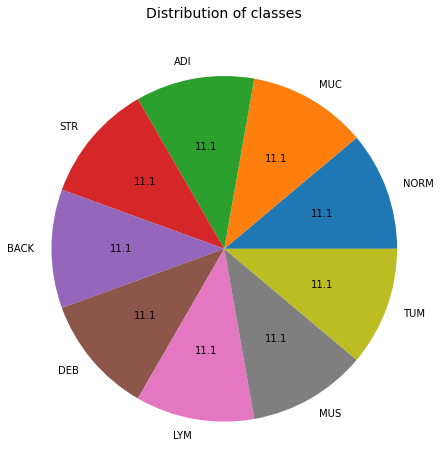

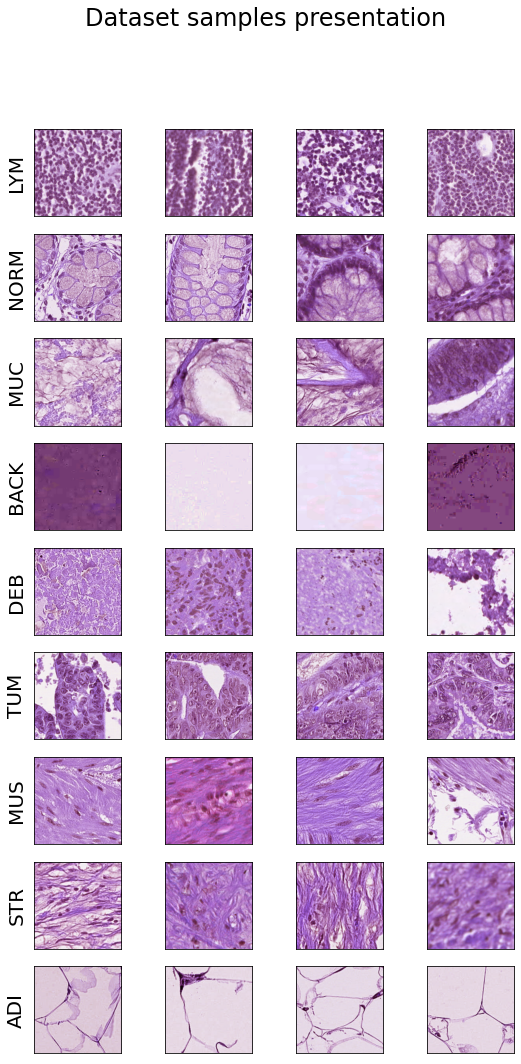

In [6]:
class_of_patch = Data_df.Class.value_counts()
print('Distribution of classes is as followed:\n{}'.format(class_of_patch[::-1]),'\n','\n')

pie_fig = plt.figure(figsize=(6,7))
pie_axis = pie_fig.add_axes([0,0,1,1])
pie_axis.pie(class_of_patch[::-1],labels=['NORM','MUC','ADI','STR','BACK','DEB','LYM','MUS','TUM'],startangle=0,autopct='%1.1f')
pie_fig.suptitle('Distribution of classes',size=14)



# Display some random samples from dataset
samp_fig, axis = plt.subplots(9,4,figsize=(9,17))
samp_fig.suptitle('Dataset samples presentation',size=24)

print('\n','\n','\n','\n')
for subdir in sub_dir:
    samples = Data_df.loc[Data_df['Class']==subdir].sample(4)
    imgs = []
    for sample in samples['ID']:
        path = join(main_path,subdir,sample)
        img = cv2.imread(path)
        imgs.append(img)
    
    
    for i , img in enumerate(imgs):
        axis[sub_dir.index(subdir),i].set_xticks([])
        axis[sub_dir.index(subdir),i].set_yticks([])
        axis[sub_dir.index(subdir),i].imshow(img)
        axis[sub_dir.index(subdir),0].set_ylabel('{}'.format(subdir),size=20)

In [7]:
y_1 = Data_df['Class']

train_test_df, val_df = train_test_split(Data_df,train_size = 0.85,random_state=101,shuffle=True,stratify=y_1 ) 

y_2 = train_test_df['Class']

train_df, test_df = train_test_split(train_test_df,train_size=0.823529,random_state=101,shuffle=True,stratify=y_2)

Class Distribution of Training Examples:
NORM    140
TUM     140
STR     140
DEB     140
LYM     140
MUC     140
ADI     140
MUS     140
BACK    139
Name: Class, dtype: int64 
 
 
 

Class Distribution of Validation Examples:
LYM     30
MUC     30
TUM     30
ADI     30
BACK    30
MUS     30
DEB     30
NORM    30
STR     30
Name: Class, dtype: int64 
 
 
 

Class Distribution of Test Examples:
BACK    31
STR     30
TUM     30
MUC     30
DEB     30
NORM    30
MUS     30
ADI     30
LYM     30
Name: Class, dtype: int64 
 
 
 



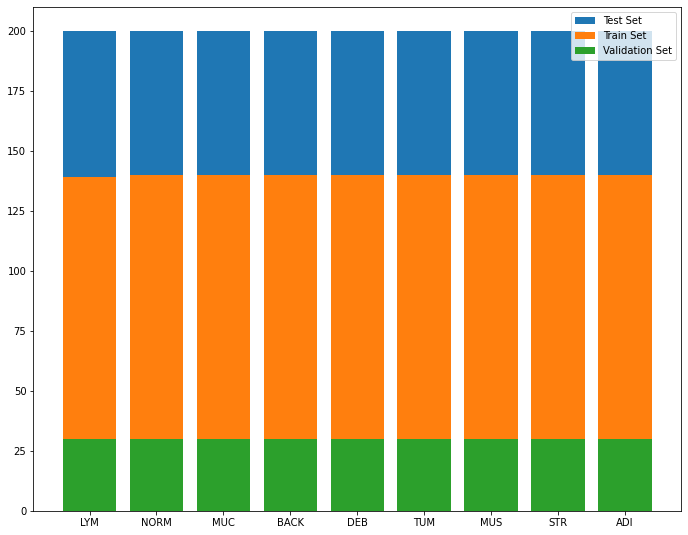

In [8]:
class_of_train_patch = train_df.Class.value_counts()
class_of_val_patch = val_df.Class.value_counts()
class_of_test_patch = test_df.Class.value_counts()

print('Class Distribution of Training Examples:\n{}'.format(class_of_train_patch),'\n','\n','\n','\n')
print('Class Distribution of Validation Examples:\n{}'.format(class_of_val_patch),'\n','\n','\n','\n')
print('Class Distribution of Test Examples:\n{}'.format(class_of_test_patch),'\n','\n','\n','\n')

#Bar plot for checking the distribution

bar_fig = plt.figure(figsize=(9,7))
bar_axis = bar_fig.add_axes([0,0,1,1])

bar_axis.bar(sub_dir,class_of_patch[::-1],label= 'Test Set')
bar_axis.bar(sub_dir,class_of_train_patch[::-1], label = 'Train Set')
bar_axis.bar(sub_dir,class_of_val_patch[::-1], label = 'Validation Set')


bar_axis.legend()

In [9]:
main_dir = 'SplittedData'
os.mkdir(main_dir)

train_dir = join(main_dir,'Training')
os.mkdir(train_dir)

val_dir = join(main_dir,'Validation')
os.mkdir(val_dir)

test_dir = join(main_dir,'Test')
os.mkdir(test_dir)


for subdir in range(len(sub_dir)):
    train_sub_dir = join(train_dir,sub_dir[subdir])
    os.mkdir(train_sub_dir)
    
    val_sub_dir = join(val_dir,sub_dir[subdir])
    os.mkdir(val_sub_dir)
    
    test_sub_dir = join(test_dir,sub_dir[subdir])
    os.mkdir(test_sub_dir)

In [10]:
Data_df.set_index('ID', inplace=True)

for img in train_df['ID']:
    label = Data_df.loc[img,'Class']
    source = join(main_path,label,img)
    dest = join(train_dir,label,img)
    
    cv2_img = cv2.imread(source)
    cv2.imwrite(dest,cv2_img)

    
for img in val_df['ID']:
    label = Data_df.loc[img,'Class']
    source = join(main_path,label,img)
    dest = join(val_dir,label,img)
    
    cv2_img = cv2.imread(source)
    cv2.imwrite(dest,cv2_img)

    
for img in test_df['ID']:
    label = Data_df.loc[img,'Class']
    source = join(main_path,label,img)
    dest = join(test_dir,label,img)
    
    cv2_img = cv2.imread(source)
    cv2.imwrite(dest,cv2_img)

In [11]:
img_size = 224
img_channel=3
input_shape=(img_size,img_size,img_channel)
BATCH_size =120
learning_rate = 3E-4
train_step = (len(train_df)/BATCH_size)
val_step = (len(val_df)/BATCH_size)

datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, vertical_flip = True)

train_ds= datagen.flow_from_directory(train_dir,
                                     target_size=(img_size,img_size),
                                     batch_size=BATCH_size,
                                     shuffle = True,
                                     seed = 101,
                                     interpolation = 'nearest',
                                     class_mode='categorical')
val_ds = datagen.flow_from_directory(val_dir,
                                     target_size=(img_size,img_size),
                                     batch_size=BATCH_size,
                                     shuffle = False,
                                     interpolation = 'nearest',
                                     class_mode='categorical')

test_ds = datagen.flow_from_directory(test_dir,
                                     target_size=(img_size,img_size),
                                     batch_size=BATCH_size,
                                     shuffle = False,
                                     interpolation = 'nearest',
                                     class_mode='categorical')

print(train_ds.class_indices)

Found 1259 images belonging to 9 classes.
Found 270 images belonging to 9 classes.
Found 271 images belonging to 9 classes.
{'ADI': 0, 'BACK': 1, 'DEB': 2, 'LYM': 3, 'MUC': 4, 'MUS': 5, 'NORM': 6, 'STR': 7, 'TUM': 8}


In [12]:
saved_model_path = 'tayyabmodel.h5'
checkpoint = ModelCheckpoint(saved_model_path, monitor='val_loss', verbose=1, save_best_only=True,
                             mode='min')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, 
                                   verbose=1, mode='max',min_delta=0.001, min_lr=0.0000001)

80134624/80134624 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 23,236,937
Trainable params: 3,212,553
Non-trainable params: 20,024,384
_________________________________________________________________
None
Epoch 1/10
11/10 [===============================] - ETA: 0s - loss: 2.0798 - accuracy: 0.4051
Epo

<AxesSubplot:>

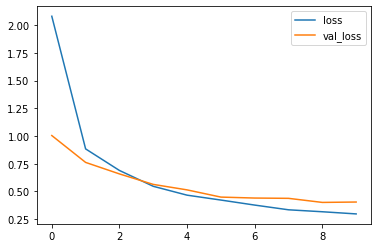

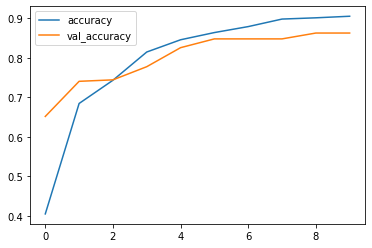

In [13]:
Base_model = VGG19(include_top=False , input_shape=(224,224,3), classifier_activation = 'softmax', weights = 'imagenet')
Base_model.trainable = False

model = keras.Sequential([
        Base_model,
        Flatten(),
        Dense(128, activation = 'relu'),
        Dense(9, activation='softmax')
    ])
    
model.compile(
    optimizer=keras.optimizers.Adam(epsilon = 0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])
print(model.summary())


history = model.fit(
    train_ds,
    steps_per_epoch= train_step,
    shuffle = True,
    validation_data = val_ds,
    validation_steps = val_step,
    verbose = 1,
    epochs = 10,
    callbacks = [checkpoint])


hist_df = pd.DataFrame(history.history)
hist_df.loc[:,['loss','val_loss']].plot()
hist_df.loc[:,['accuracy','val_accuracy']].plot()

In [14]:
model.load_weights('tayyabmodel.h5')

Base_model.trainable = True

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001, epsilon = 0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

history = model.fit(
    train_ds,
    steps_per_epoch= train_step,
    shuffle = True,
    validation_data = val_ds,
    validation_steps = val_step,
    verbose = 1,
    epochs = 8,
    callbacks=[checkpoint,reduce_lr])

# serialize model to JSON
model_json = model.to_json()
with open("CRC_modelinception.json", "w") as json_file:             
     json_file.write(model_json) 

# serialize weights to HDF5
model.save_weights("CRC_modelinception.h5")
print("Saved model to disk")

Epoch 1/8
11/10 [===============================] - ETA: -1s - loss: 0.3045 - accuracy: 0.9047
Epoch 1: val_loss improved from 0.40152 to 0.34596, saving model to tayyabmodel.h5
10/10 [==============================] - 54s 3s/step - loss: 0.3045 - accuracy: 0.9047 - val_loss: 0.3460 - val_accuracy: 0.8963 - lr: 1.0000e-05
Epoch 2/8
11/10 [===============================] - ETA: 0s - loss: 0.2266 - accuracy: 0.9325
Epoch 2: val_loss did not improve from 0.34596
10/10 [==============================] - 23s 2s/step - loss: 0.2266 - accuracy: 0.9325 - val_loss: 0.3897 - val_accuracy: 0.8704 - lr: 1.0000e-05
Epoch 3/8
11/10 [===============================] - ETA: 0s - loss: 0.1848 - accuracy: 0.9420
Epoch 3: val_loss improved from 0.34596 to 0.30489, saving model to tayyabmodel.h5

Epoch 3: ReduceLROnPlateau reducing learning rate to 2.9999999242136253e-06.
10/10 [==============================] - 24s 2s/step - loss: 0.1848 - accuracy: 0.9420 - val_loss: 0.3049 - val_accuracy: 0.8926 - lr:

  3/270 [..............................] - ETA: 1:41 - loss: 0.3087 - accuracy: 0.8852

270/270 [==============================] - 2s 4ms/step - loss: 0.3087 - accuracy: 0.8852
val_loss: 0.30866172909736633
val_acc: 0.885185182094574


<AxesSubplot:>

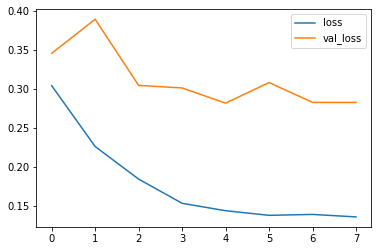

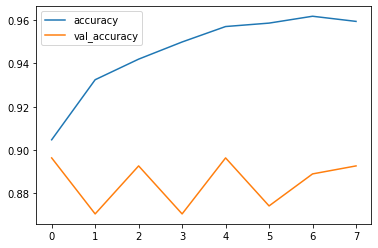

In [15]:
model.load_weights('tayyabmodel.h5')

val_loss, val_acc = model.evaluate(val_ds, 
                        steps=len(val_df))

print('val_loss:', val_loss)
print('val_acc:', val_acc)

hist_df = pd.DataFrame(history.history)
hist_df.loc[:,['loss','val_loss']].plot()
hist_df.loc[:,['accuracy','val_accuracy']].plot()

3/3 [==============================] - 9s 3s/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 7 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 6 4 2 4 4 4 4 4 4 4 4 5 4 4 8 6 4 5
 4 4 4 5 5 0 5 5 7 5 7 7 5 5 5 5 0 8 7 5 5 7 5 5 7 5 5 7 7 5 7 7 5 6 8 8 6
 6 6 6 6 6 6 6 6 6 6 6 6

<AxesSubplot:>

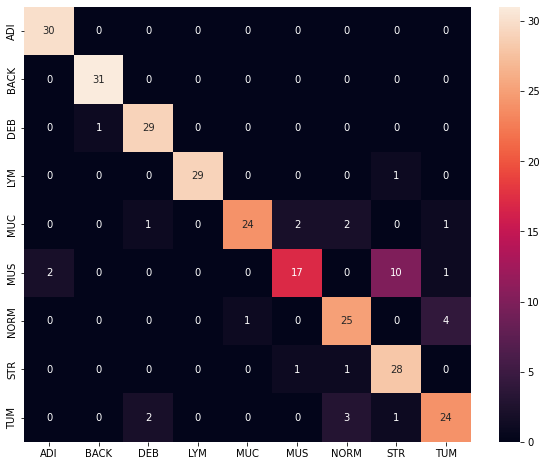

In [16]:
predictions = model.predict(test_ds, verbose=1)

y_true = test_ds.classes
print(y_true)

y_pred=np.argmax(predictions,axis=1)
print(y_pred)    

cm = confusion_matrix(y_true,y_pred)




print(cm)

labels = ['ADI','BACK', 'DEB','LYM','MUC','MUS','NORM','STR','TUM']

report = classification_report(y_true, y_pred, target_names=labels)

print(report)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot= True, xticklabels=labels, yticklabels= labels)

In [18]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [19]:
!kaggle datasets download -d imrankhan77/crc-val-he-7k

100% 787M/787M [00:40<00:00, 23.5MB/s]
100% 787M/787M [00:40<00:00, 20.5MB/s]


In [20]:
import zipfile
zip_ref = zipfile.ZipFile('/content/crc-val-he-7k.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [21]:
test_dir = '/content/CRC-VAL-HE-7K'
test_set = datagen.flow_from_directory(test_dir, target_size= (224,224),batch_size = 120, 
                                       shuffle = False , class_mode='categorical' )

y_pred_non_decoded = model.predict(test_set, verbose=1)
y_pred = np.argmax(y_pred_non_decoded, axis=1)
report = classification_report(test_set.classes, y_pred, target_names=labels)
print(report)

val_loss, val_acc = model.evaluate(test_ds, 
                        steps=len(val_df))

print('val_loss:', val_loss)
print('val_acc:', val_acc)

Found 7180 images belonging to 9 classes.
60/60 [==============================] - 46s 772ms/step
              precision    recall  f1-score   support

         ADI       0.97      0.98      0.98      1338
        BACK       0.99      0.99      0.99       847
         DEB       0.52      0.65      0.58       339
         LYM       0.95      0.85      0.90       634
         MUC       0.89      0.82      0.85      1035
         MUS       0.53      0.55      0.54       592
        NORM       0.85      0.90      0.87       741
         STR       0.43      0.64      0.51       421
         TUM       0.94      0.77      0.85      1233

    accuracy                           0.83      7180
   macro avg       0.79      0.79      0.79      7180
weighted avg       0.85      0.83      0.84      7180

  3/270 [..............................] - ETA: 2:21 - loss: 0.2698 - accuracy: 0.8819

270/270 [==============================] - 2s 4ms/step - loss: 0.2698 - accuracy: 0.8819
val_loss: 0.26982876658439636
val_acc: 0.8819188475608826
